# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
#before starting to code following has done
#on dev environment, conda install -c pyviz hvplot geoviews, pip install citipy
#Api key added to weather_api_key in api_keys.py and saved
#Api key added to geoapify_key in api_keys.py and saved

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#import json
#from pprint import pprint
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
from api_keys import geoapify_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# # city_weather = requests.get(query_url).json()
# # city_weather
# pprint

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    query_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url).json()
 
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lon = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lon, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })
    # If an error is experienced, skip the city?
    except:
        print("City not found. Skipping...")
        pass
    # Indicate that Data Loading is complete 
        print("-----------------------------")
        print("Data Retrieval Complete      ")
        print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | polyarnyy
Processing Record 2 of Set 1 | pandan
Processing Record 3 of Set 1 | qaqortoq
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | constantia
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | tarakan
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | kourou
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | tambopata
Processing Record 12 of Set 1 | badger
Processing Record 13 of Set 1 | duong dong
Processing Record 14 of Set 1 | cabo san lucas
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | ashland
Processing Record 17 of Set 1 | christchurch
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | sosnovo-ozerskoye
Processing Record 21 of Set 1 | la passe
Processing Record 22 of Set 1 | san an

Processing Record 27 of Set 4 | kiruna
Processing Record 28 of Set 4 | alice springs
Processing Record 29 of Set 4 | awjilah
Processing Record 30 of Set 4 | akureyri
Processing Record 31 of Set 4 | ilhabela
Processing Record 32 of Set 4 | karratha
Processing Record 33 of Set 4 | jalai nur
Processing Record 34 of Set 4 | khor
Processing Record 35 of Set 4 | vila franca do campo
Processing Record 36 of Set 4 | al ajaylat
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 4 | tobruk
Processing Record 38 of Set 4 | mount gambier
Processing Record 39 of Set 4 | burang
Processing Record 40 of Set 4 | ipojuca
Processing Record 41 of Set 4 | zhosaly
Processing Record 42 of Set 4 | coahuayana de hidalgo
Processing Record 43 of Set 4 | nampula
Processing Record 44 of Set 4 | hamilton
Processing Record 45 of Set 4 | luoyang
Processing Record 46 of Set 4 | northam
Processing Record 47 of Set 4 | remire-m

City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 9 of Set 8 | qamdo
Processing Record 10 of Set 8 | qiongshan
Processing Record 11 of Set 8 | manaure
Processing Record 12 of Set 8 | ghanzi
Processing Record 13 of Set 8 | wuchang
Processing Record 14 of Set 8 | waingapu
Processing Record 15 of Set 8 | bei'an
Processing Record 16 of Set 8 | pangody
Processing Record 17 of Set 8 | jashpurnagar
Processing Record 18 of Set 8 | murun-kuren
Processing Record 19 of Set 8 | novo aripuana
Processing Record 20 of Set 8 | yangor
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 21 of Set 8 | nacala
Processing Record 22 of Set 8 | newman
Processing Record 23 of Set 8 | tindouf
Processing Record 24 of Set 8 | pathein
Processing Record 25 of Set 8 | les avirons
Processing Record 26 of Set 8 | chiang klang
Processing Record 27 of S

Processing Record 38 of Set 11 | male
Processing Record 39 of Set 11 | tobi village
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 11 | zakynthos
Processing Record 41 of Set 11 | siocon
Processing Record 42 of Set 11 | ventspils
Processing Record 43 of Set 11 | stanthorpe
Processing Record 44 of Set 11 | adigrat
Processing Record 45 of Set 11 | yung shue wan
Processing Record 46 of Set 11 | dawesville
Processing Record 47 of Set 11 | conde
Processing Record 48 of Set 11 | taoudenni
Processing Record 49 of Set 11 | port sudan
Processing Record 0 of Set 12 | mermoz boabab
Processing Record 1 of Set 12 | beerwah
Processing Record 2 of Set 12 | gorontalo
Processing Record 3 of Set 12 | aldan
Processing Record 4 of Set 12 | saldanha
Processing Record 5 of Set 12 | cairns city
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
P

In [9]:
city_weather

{'coord': {'lon': -70.0995, 'lat': 41.2835},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 16.77,
  'feels_like': 16.67,
  'temp_min': 16.19,
  'temp_max': 21.03,
  'pressure': 1019,
  'humidity': 83},
 'visibility': 10000,
 'wind': {'speed': 10.8, 'deg': 10},
 'clouds': {'all': 100},
 'dt': 1696187343,
 'sys': {'type': 1,
  'id': 3218,
  'country': 'US',
  'sunrise': 1696156600,
  'sunset': 1696199007},
 'timezone': -14400,
 'id': 4944903,
 'name': 'Nantucket',
 'cod': 200}

In [38]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [39]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,polyarnyy,69.1989,33.4478,6.26,81,100,6.65,RU,1696187966
1,pandan,14.0453,124.1694,27.29,87,100,4.25,PH,1696187410
2,qaqortoq,60.7167,-46.0333,3.05,82,100,2.14,GL,1696187410
3,blackmans bay,-43.0167,147.3167,6.40,90,14,2.69,AU,1696187410
4,constantia,44.1833,28.6500,19.38,54,95,5.85,RO,1696187410


In [40]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/CitiesByYK.csv", index_label="City_ID")

In [41]:
# Read saved data
city_data_df = pd.read_csv("../output_data/CitiesByYK.csv", index_col="City_ID")

# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,polyarnyy,69.1989,33.4478,6.26,81,100,6.65,RU,1696187966
1,pandan,14.0453,124.1694,27.29,87,100,4.25,PH,1696187410
2,qaqortoq,60.7167,-46.0333,3.05,82,100,2.14,GL,1696187410
3,blackmans bay,-43.0167,147.3167,6.40,90,14,2.69,AU,1696187410
4,constantia,44.1833,28.6500,19.38,54,95,5.85,RO,1696187410
5,jamestown,42.0970,-79.2353,25.01,61,20,4.63,US,1696187258
6,tarakan,3.3000,117.6333,26.52,83,100,1.79,ID,1696187410
7,port-aux-francais,-49.3500,70.2167,6.49,97,100,19.82,TF,1696187411
8,kourou,5.1552,-52.6478,32.03,65,100,6.10,GF,1696187411


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

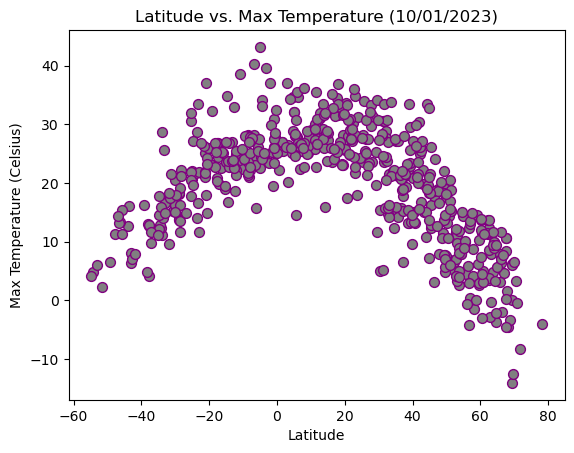

In [51]:
# Build scatter plot for latitude vs. temperature #plt.grid(True) not working????????????????????????
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='purple', c='gray', s=50)

# Incorporate the other graph properties
plt.title("Latitude vs. Max Temperature (10/01/2023)")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid=True

# Save the figure
plt.savefig("../output_data/LatitudeVSTemperaturebyYK.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

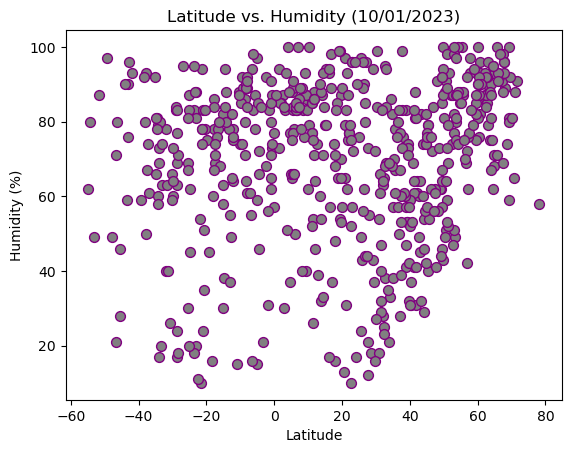

In [52]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='purple', c='gray', s=50)

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity (10/01/2023)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid=True

# Save the figure
plt.savefig("../output_data/LatitudeVSHumidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

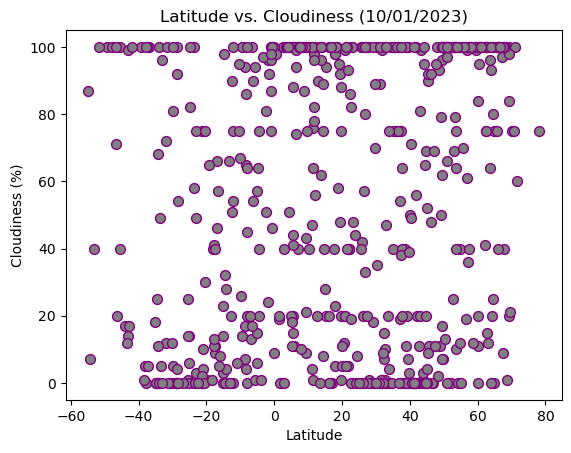

In [54]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='purple', c='gray', s=50)

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness (10/01/2023)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid=True

# Save the figure
plt.savefig("../output_data/LatitudeVSCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

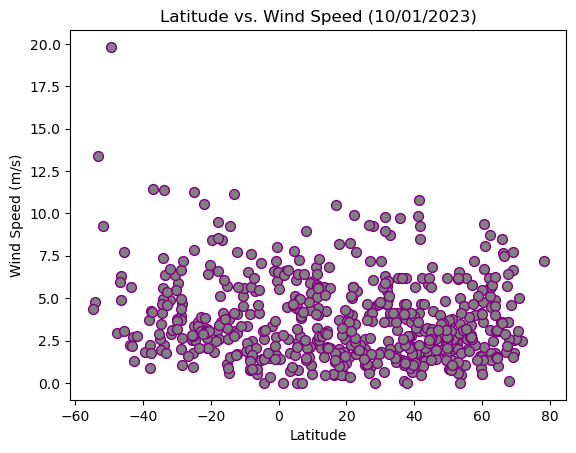

In [55]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='purple', c='gray', s=50)

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed (10/01/2023)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid=True

# Save the figure
plt.savefig("../output_data/LatitudeVSWindSpeed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


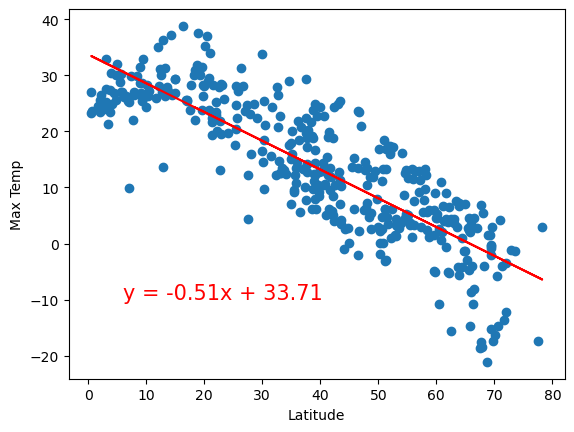

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


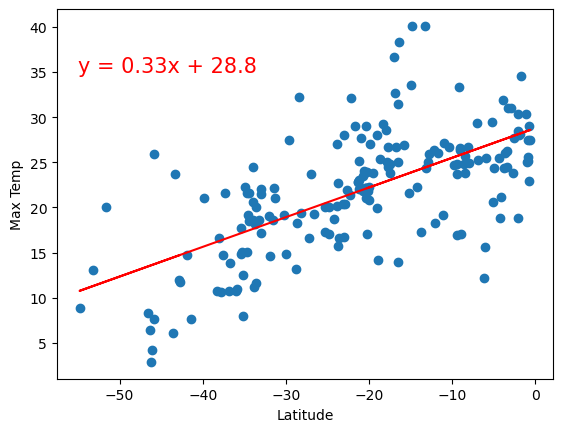

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


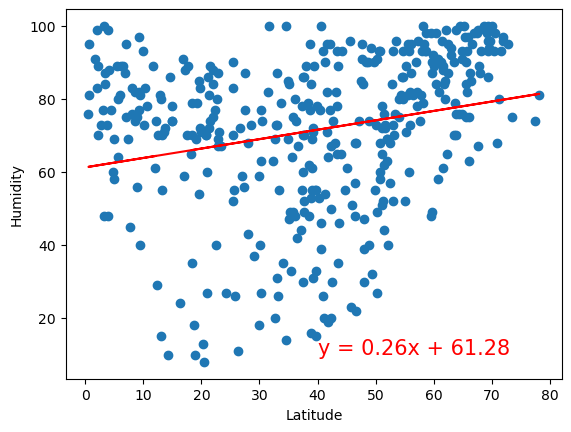

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


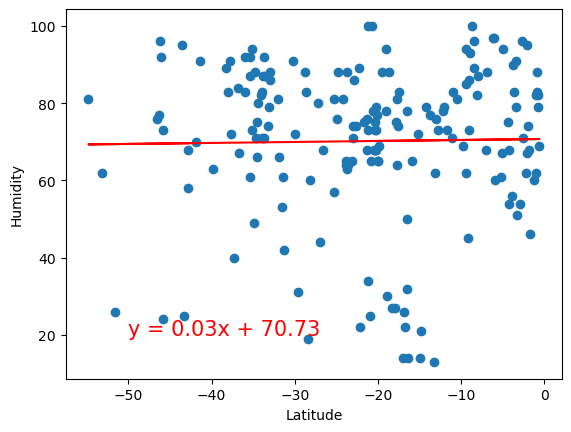

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


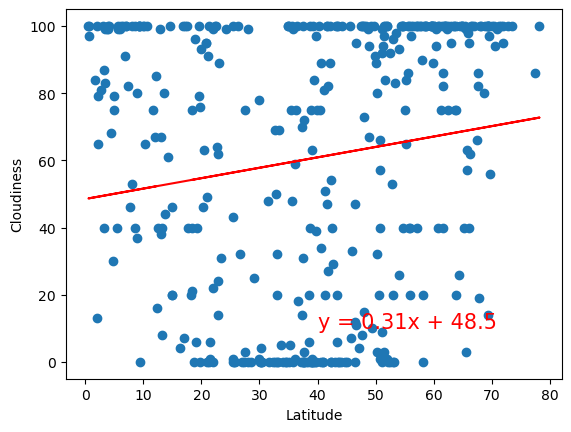

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


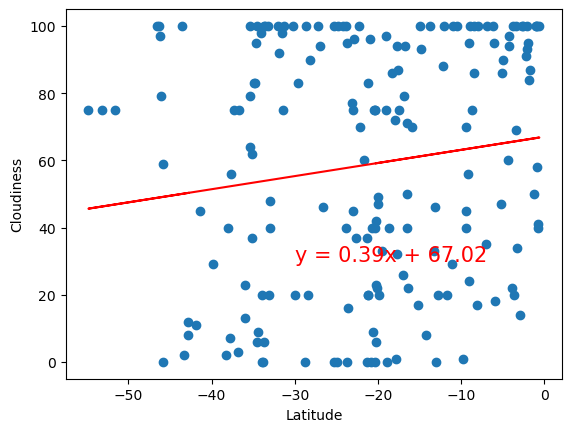

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


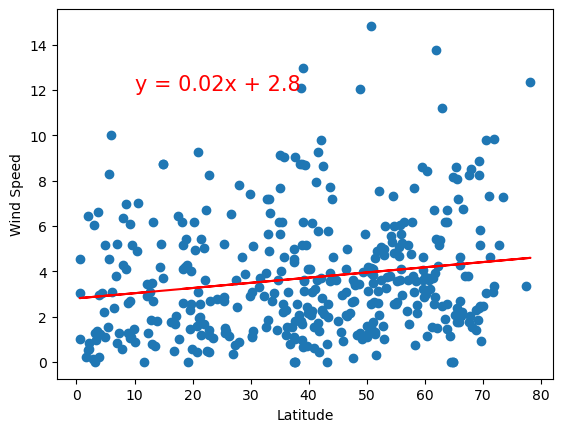

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


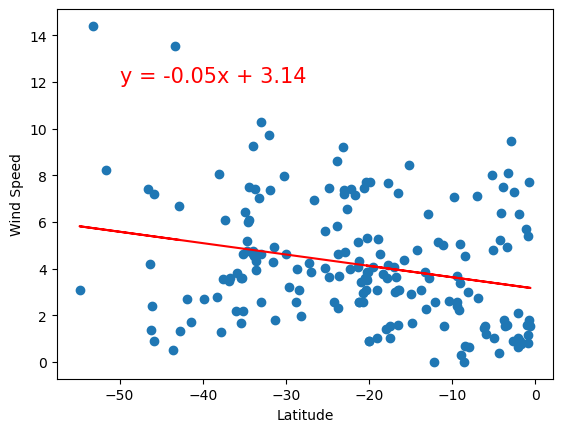

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE